In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

def work_space(path):
    while True:
        if os.path.split(path)[1] != "Calibrator":
            path = os.path.split(path)[0]
        else:
            return path.replace("\\", "/")
work_dir = work_space(os.getcwd())

data_path = work_dir + "/DataFiles/"
filenames = os.listdir(data_path)
data_files = [data_path + data_file for data_file in filenames]


def file_analysis(data_file, fname, lower, upper, topnum):
    
    with open(data_file, mode = 'r') as f:
        channels = []
        contents = []
        
        Nhead = 7
        print("Data in the first ", Nhead," lines of the file: ", fname)
        for i in range(Nhead):
             line = f.readline()
             print(line, end = " ")
             
        Nchans = 0
        for line in f:
             channel, energy, content = line.split(", ")
             channels.append(float(channel))
             contents.append(float(content))
             Nchans += 1
        
        print("Amount of Channels in Spectrum: ", Nchans)
    f.close()
    
    
    # Integrere innhold i Nomr omrÃ¥der mellom nedre[i] og ovre[i] grenser
    TotalContent = [0 for i in range(topnum)]
    Average = [0 for i in range(topnum)]
    merketx = []
    merkety = []
    SumSquare = [0 for i in range(topnum)]
    StandDev = [0 for i in range(topnum)]
    SSUnc = [0 for i in range(topnum)]
    
    for i in range(topnum):
        TotalContent[i] = np.sum(contents[lower[i]:upper[i]])
        Average[i] = np.sum(np.array(channels) * np.array(contents)) / TotalContent[i]
        SumSquare[i] = np.sum(np.array(channels) ** 2 * np.array(contents))
        merketx.append([channels[index] for index in range(lower[i], upper[i])])
        merkety.append([contents[index] for index in range(lower[i], upper[i])])
        
        StandDev[i] = np.sqrt((TotalContent[i] * SumSquare[i] - Average[i] ** 2) / (TotalContent[i] * (TotalContent[i] - 1)))
        SSUnc[i] = StandDev[i] / np.sqrt(TotalContent[i])                   
        
        print("Counts between ", lower[i], " and " , upper[i], " are", TotalContent[i])
        print("Average ","%12.3f" % Average[i], " +/- ", "%12.3f" % SSUnc[i])
        print("Standard Deviation in Area ","%12.3f" % StandDev[i])
    
    # Plotting
    style = "seaborn-v0_8-darkgrid"
    plt.style.use(style)
    plt.plot(channels, contents)
    for i in range(topnum):
        plt.plot(merketx[i], merkety[i], markersize = 3.)
    
    plt.xlabel("Channel Counts")
    plt.ylabel("Counts")
    plt.title(fname)
    plt.show()

Data in the first  7  lines of the file:  cs137-2022.csv
Start Time, Mon Nov 7 12:32:33 GMT+0100 2022
 Energy calibration,  Offset: 0, Slope: 2, Quadratic: 0
 Live Time (s), 43.863204
 Real Time (s), 45.482174
 Elapsed Computational, 0
 Spectrum
 Channel, Energy (keV), Counts
 Amount of Channels in Spectrum:  1024
Counts between  410  and  510  are 100612.0
Average       653.747  +/-           nan
Standard Deviation in Area           nan


C:\Users\mhals\AppData\Local\Temp\ipykernel_27488\904228706.py:57: RuntimeWarning: invalid value encountered in sqrt
  StandDev[i] = np.sqrt((TotalContent[i] * SumSquare[i] - Average[i] ** 2) / (TotalContent[i] * (TotalContent[i] - 1)))


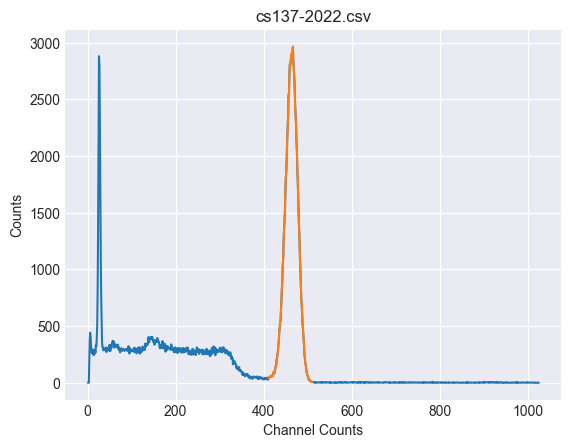

Data in the first  7  lines of the file:  Na22-2022.csv
Start Time, Mon Nov 7 12:37:49 GMT+0100 2022
 Energy calibration,  Offset: 0, Slope: 2, Quadratic: 0
 Live Time (s), 127.537086
 Real Time (s), 127.978867
 Elapsed Computational, 0
 Spectrum
 Channel, Energy (keV), Counts
 Amount of Channels in Spectrum:  1024
Counts between  320  and  400  are 18764.0
Average       990.037  +/-           nan
Standard Deviation in Area           nan


C:\Users\mhals\AppData\Local\Temp\ipykernel_27488\904228706.py:57: RuntimeWarning: invalid value encountered in sqrt
  StandDev[i] = np.sqrt((TotalContent[i] * SumSquare[i] - Average[i] ** 2) / (TotalContent[i] * (TotalContent[i] - 1)))


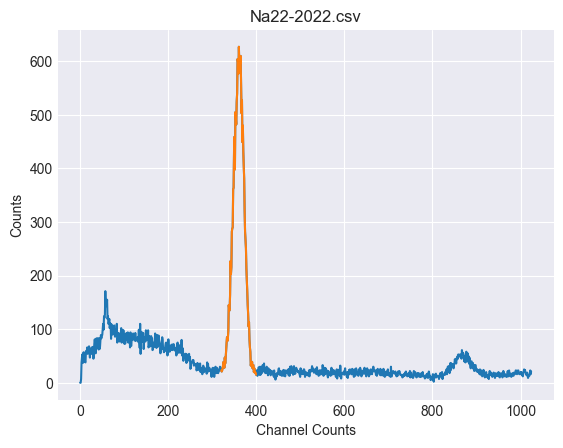

Data in the first  7  lines of the file:  Radium-2022.csv
Start Time, Mon Nov 7 12:42:36 GMT+0100 2022
 Energy calibration,  Offset: 0, Slope: 2, Quadratic: 0
 Live Time (s), 187.677162
 Real Time (s), 192.375417
 Elapsed Computational, 0
 Spectrum
 Channel, Energy (keV), Counts
 Amount of Channels in Spectrum:  1024
Counts between  120  and  155  are 44968.0
Average      3738.800  +/-           nan
Standard Deviation in Area           nan
Counts between  155  and  194  are 48054.0
Average      3498.697  +/-           nan
Standard Deviation in Area           nan
Counts between  194  and  231  are 63971.0
Average      2628.165  +/-           nan
Standard Deviation in Area           nan
Counts between  231  and  285  are 93796.0
Average      1792.468  +/-           nan
Standard Deviation in Area           nan
Counts between  390  and  465  are 57127.0
Average      2943.028  +/-           nan
Standard Deviation in Area           nan


C:\Users\mhals\AppData\Local\Temp\ipykernel_27488\904228706.py:57: RuntimeWarning: invalid value encountered in sqrt
  StandDev[i] = np.sqrt((TotalContent[i] * SumSquare[i] - Average[i] ** 2) / (TotalContent[i] * (TotalContent[i] - 1)))


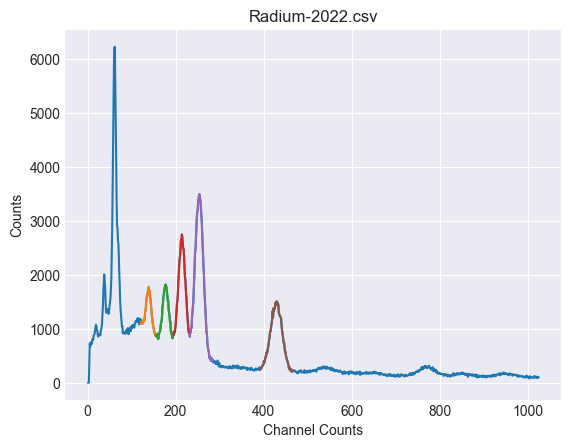

In [2]:
# Place the lower and upper values for the interval
# Each list in the lists corresponds to the lower and upper
# Values in the files being analyzed in the order they are analyzed
lowers = [[410], [320], [120, 155, 194, 231, 390]]
uppers = [[510], [400], [155, 194, 231, 285, 465]]
topnums = [len(upper) for upper in uppers]

for filename, filedata, lower, upper, topnum in zip(filenames, data_files, lowers, uppers, topnums):
    file_analysis(filedata, filename, lower, upper, topnum)